In [18]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
data_df = pd.merge(clinical_df, mouse_df, how='outer', on='Mouse ID')

# Display the data table for preview
data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Create a group based on the values in the Drug and Timepoint columns
data_group = data_df.groupby(['Drug', 'Timepoint'])

# Calculate the mean for each Tumor Volume Data in our group
tumor_mean = data_group['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
tumor_mean_df = tumor_mean.reset_index()

# Preview DataFrame
tumor_mean_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_error = data_group['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
tumor_error_df = tumor_error.reset_index()
# Preview DataFrame
tumor_error_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [43]:
# Minor Data Munging to Re-Format the Data Frames
data_reformat = data_df.pivot_table(index=['Timepoint'], columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
data_reformat.head()



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


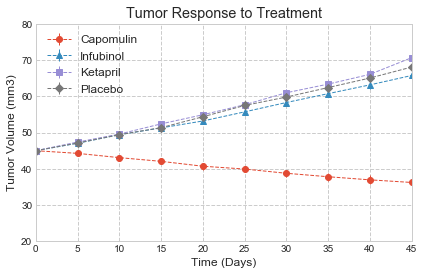

In [82]:
x_axis = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
x_limit = 45
plt.figure(figsize=(6,4))

error = std_error["Capomulin"]
cap = plt.errorbar(x_axis, df_filter["Capomulin"], yerr=error, fmt="o", ls="dashed", linewidth=1, alpha=1)

error = std_error["Infubinol"]
infu = plt.errorbar(x_axis, df_filter["Infubinol"], yerr=error, fmt="^", ls="dashed", linewidth=1, alpha=1)

error = std_error["Ketapril"]
keta = plt.errorbar(x_axis, df_filter["Ketapril"], yerr=error, fmt="s", ls="dashed", linewidth=1, alpha=1)

error = std_error["Placebo"]
plac = plt.errorbar(x_axis, df_filter["Placebo"], yerr=error, fmt="D", ls="dashed", linewidth=1, alpha=1)

plt.ylim(20, 80)
plt.xlim(0, 45)

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")


# Set x and y axis labels including the title of the chart
ax.set_title('Tumor Response to Treatment') # Give plot main title
ax.set_xlabel('Time (Days)') # set text for the x axis
ax.set_ylabel('Tumor Volume(mm3)') # set text for the y axis
plt.style.use('seaborn-whitegrid')
plt.grid(linestyle="dashed")

plt.grid(linestyle="dashed")
plt.legend((cap, infu, keta, plac), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)

# Save the Figure
plt.savefig("TumorResponseTreatment.png")

# Show the plot
plt.show()

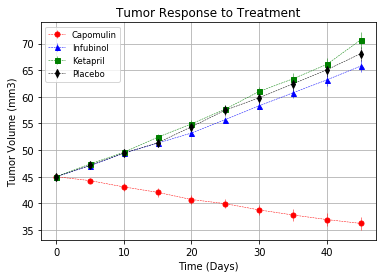

In [5]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [22]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_mean = data_group['Metastatic Sites'].mean()
# Convert to DataFrame
meta_mean_df = meta_mean.reset_index()
#Set the Drug as the index
meta_mean_df = meta_mean_df.set_index(['Drug', 'Timepoint'])
# Preview DataFrame
meta_mean_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [23]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_error = data_group['Metastatic Sites'].sem()
# Convert to DataFrame
meta_error_df = meta_error.reset_index()
# Set the Drug and Timepoint columns as the index
meta_error_df = meta_error_df.set_index(['Drug', 'Timepoint'])
# Preview DataFrame
meta_error_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
data_reformat = data_df.pivot_table(index=['Timepoint'], columns='Drug', values='Tumor Volume (mm3)')
# Preview that Reformatting worked
data_reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


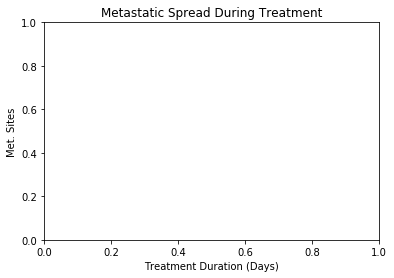

In [10]:
meta_filter = 

x_axis = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
x_limit = 45
plt.figure(figsize=(6,4))

error = meta_error_df["Capomulin"]
cap = plt.errorbar(x_axis, df_filter["Capomulin"], yerr=error, fmt="o", ls="dashed", linewidth=1, alpha=1)

error = meta_error_df["Infubinol"]
infu = plt.errorbar(x_axis, df_filter["Infubinol"], yerr=error, fmt="^", ls="dashed", linewidth=1, alpha=1)

error = meta_error_df["Ketapril"]
keta = plt.errorbar(x_axis, df_filter["Ketapril"], yerr=error, fmt="s", ls="dashed", linewidth=1, alpha=1)

error = meta_error_df["Placebo"]
plac = plt.errorbar(x_axis, df_filter["Placebo"], yerr=error, fmt="D", ls="dashed", linewidth=1, alpha=1)

plt.ylim(20, 80)
plt.xlim(0, 45)

plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')


# Set x and y axis labels including the title of the chart
ax.set_title('Metastatic Spread During Treatment') # Give plot main title
ax.set_xlabel('Treatment Duration (Days)') # set text for the x axis
ax.set_ylabel('Met. Sites') # set text for the y axis
plt.style.use('seaborn-whitegrid')
plt.grid(linestyle="dashed")

plt.grid(linestyle="dashed")
plt.legend((cap, infu, keta, plac), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)


# Save the Figure
plt.savefig("MetastaticSpreadDuringTreatment.png")

# Show the Figure
plt.show()

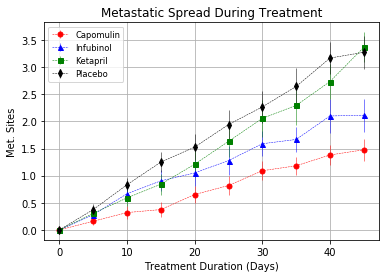

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = data_group['Mouse ID'].count()
# Convert to DataFrame
mice_count_df = mice_count.reset_index().rename(columns={'Mouse ID':'Mouse Count'})
# Preview DataFrame
mice_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
mice_reformat = mice_count_df.pivot_table(index=['Timepoint'], columns='Drug', values='Mouse Count')
# Preview the Data Frame
mice_reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


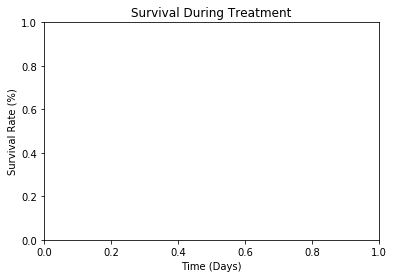

In [13]:
# Generate the Plot (Accounting for percentages)
fig = plt.figure(figsize = (6, 4))
ax = fig.gca()

ax.set_title('Survival During Treatment') # Give plot main title
ax.set_xlabel('Time (Days)') # set text for the x axis
ax.set_ylabel('Survival Rate (%)') # set text for the y axis

# Save the Figure
plt.savefig("SurvivalDuringTreatment.png")
# Show the Figure
plt.show()

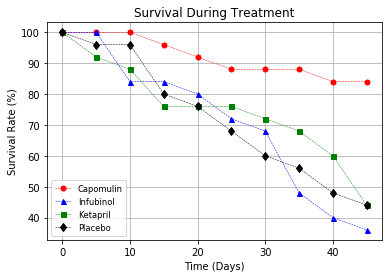

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
change_drug = data_df['Drug'].value_counts()
# Display the data to confirm
change_drug

Capomulin    230
Ramicane     228
Stelasyn     194
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug, dtype: int64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

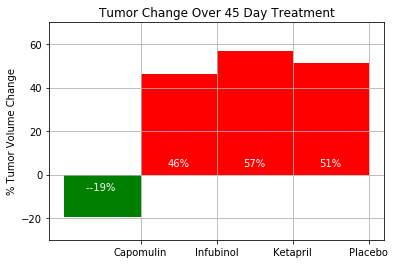